# inserting importnt libs##

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Merging 12 months of sales data in one file###

In [5]:
files=[file for file in os.listdir("./Sales_Data")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
### now we take all months data and merge them into one ###

In [7]:
### dataframe of single month data###
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
#df.head()

In [8]:
### creating the blank dataframe###
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/{}".format(file))
    #### concatination with all_month_data#####
    ## ob3=pd.concat([ob1,ob2])##
    all_months_data=pd.concat([all_months_data,df])
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_months_data.to_csv("all_data.csv",index=False) ##no extra indexing

# reading the all_data.csv###

In [10]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# cleaning up the data###

In [11]:
##Showing Nans##
##axis=1 << Row wise search
##axis=0 << Colum wise search
## if any row element is Nan
nan_df=all_data[all_data.isna().any(axis=1)]#if all row Nan then "all"
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
##Drop rows including Nan##
###if "all" element of row is null
all_data=all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
##Find or and delete it##
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
### Dropping rows where Month="Or"##
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

# augment data with additional colums##

In [15]:
###Task1:: adding month column##### 1st 2 strings of date##
all_data['Month']=all_data['Order Date'].str[0:2]

In [16]:
###Task2: converting it in integer###
all_data['Month']=all_data['Month'].astype("int32")

In [17]:
###Task3: Add a city column## ## use .apply() << super fast ###
##lambda:: for each cell content , split and get 1 indexed value

def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x:"{}({})".format(get_city(x),get_state(x)))

##all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
 
#all_data.drop(columns='Column',inplace=True)
all_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


# what is the best month for sales? and how much money earned in that month?

In [18]:
###adding a sales column###
###make int ##pd.to_numaric
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
##make float ##pd.to_numaric
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99


In [19]:
results=all_data.groupby('Month').sum() ### automatically sum up numaric values
#all_data.groupby('Month').sum()['Sales']

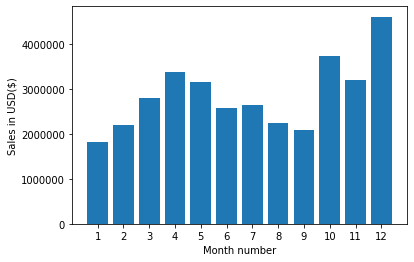

In [20]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

# What city has the highest no of sales?

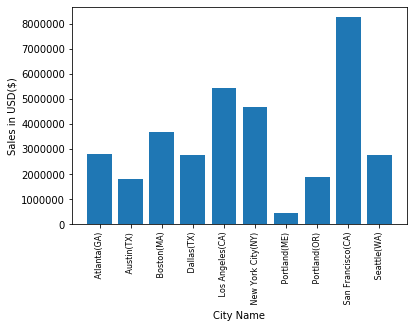

In [21]:
results=all_data.groupby('City').sum()
cities=results.index ##.unique()### ##index by default unidue## OR
###cities=all_data['City'].unique()
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()

# What time should we display adds to maximize likelyhood of customer's buying product?

In [22]:
##date time object making
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
#### creating Hour column
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
#all_data.head()

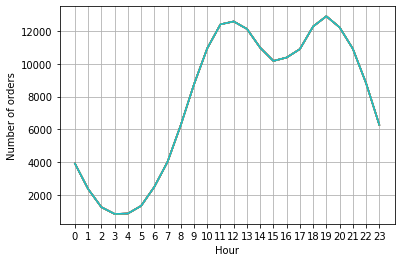

In [23]:
###hour and corresponding values as dataframe (hour,df)
### we dont need df here
##hours=[hour for hour,df in all_data.groupby('Hour')]
count_dataframe=all_data.groupby('Hour').count()
hours=count_dataframe.index
orders_per_hour=count_dataframe['Order ID']
plt.plot(hours,all_data.groupby('Hour').count()) ##no of sales for each hour
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

# What products are most often sold together?

# Practice

In [55]:
### creating a DataFrame based on 'Order ID' from all_data

ID_df=pd.DataFrame(columns=['ID'])
ID_df['ID']=all_data['Order ID']
#ID_df.head() or
all_data['Order ID'].head() ######## we can directly use that

0    176558
2    176559
3    176560
4    176560
5    176561
Name: Order ID, dtype: object

In [56]:
#ID_df.duplicated(keep=False).head() OR
all_data['Order ID'].duplicated(keep=False).head()

0    False
2    False
3     True
4     True
5    False
Name: Order ID, dtype: bool

In [64]:
#all_data[ID_df.duplicated(keep=False)].sort_values(by=['Order ID']).head(20) OR
df_p=all_data[all_data['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'])

In [71]:
df_p.groupby('Order ID')['Product']

In [68]:
## joining each product using , after groupped by Order ID 


df_p['Grouped']=df_p.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df_p.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Grouped
67588,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin(TX),11.95,16,6,"USB-C Charging Cable,Wired Headphones"
67589,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin(TX),11.99,16,6,"USB-C Charging Cable,Wired Headphones"
67605,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles(CA),11.52,8,25,"AA Batteries (4-pack),Apple Airpods Headphones"
67604,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles(CA),150.00,8,25,"AA Batteries (4-pack),Apple Airpods Headphones"
67680,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,New York City(NY),400.00,11,19,"Vareebadd Phone,Wired Headphones"


# Apply


In [60]:
df=all_data[all_data['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'],ascending=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
67588,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin(TX),11.95,16,6
67589,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin(TX),11.99,16,6
67605,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles(CA),11.52,8,25
67604,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles(CA),150.00,8,25
67680,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,New York City(NY),400.00,11,19


In [69]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Grouped
67588,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin(TX),11.95,16,6,"USB-C Charging Cable,Wired Headphones"
67589,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin(TX),11.99,16,6,"USB-C Charging Cable,Wired Headphones"
67605,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles(CA),11.52,8,25,"AA Batteries (4-pack),Apple Airpods Headphones"
67604,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles(CA),150.00,8,25,"AA Batteries (4-pack),Apple Airpods Headphones"
67680,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,New York City(NY),400.00,11,19,"Vareebadd Phone,Wired Headphones"


In [23]:
## dropout duplicated occurances
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
#### number of  2 or 3 or n items sold together , descending order
count=Counter() ####### count <- is a iterator, can store status
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
####count.most_common(10) OR
for key,value in count.most_common(10): ### top 10 sold pairs
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# what product sold the most? and why?

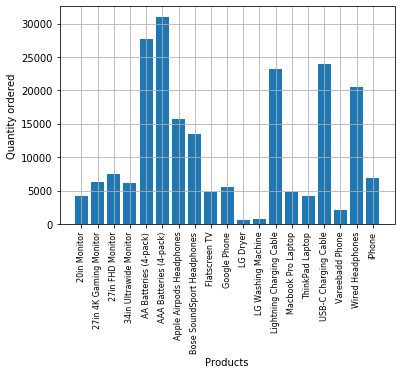

In [25]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
plt.bar(quantity_ordered.index,quantity_ordered)
plt.xticks(quantity_ordered.index,rotation='vertical',size=8)
plt.xlabel('Products')
#plt.yticks(quantity_ordered)
plt.ylabel('Quantity ordered')
plt.grid()
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


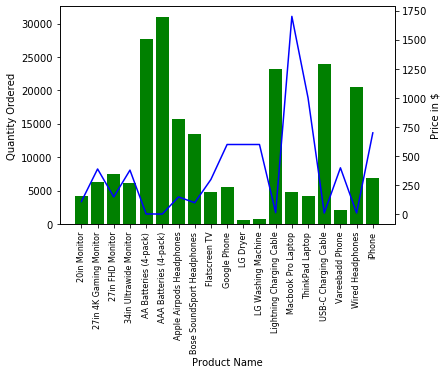

In [26]:
prices=all_data.groupby('Product').mean()['Price Each']

fig,ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(quantity_ordered.index,quantity_ordered,color='g')
ax2.plot(prices.index,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')

ax2.set_ylabel('Price in $')

ax1.set_xticklabels(quantity_ordered.index,rotation='vertical',size=8)

fig.show()

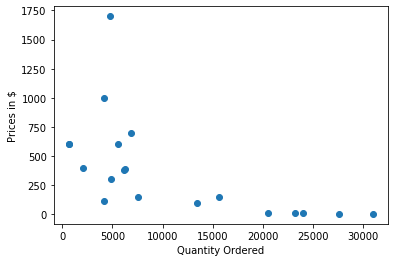

In [28]:
plt.scatter(quantity_ordered,prices)
plt.xlabel('Quantity Ordered')
plt.ylabel('Prices in $')
plt.show() #nearly a exponential distribution